# 6.5 Unsupervised Machine Learning - Clustering

## The script below contains the following:
### 1. Import libraries and data
### 2. The elbow technique
### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Creating the path variable

path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [4]:
# Importing district dataframe

dist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'district_clean.pkl'))

In [5]:
# Creating a subset of the dataset

df = dist[(dist['year'] >= 2000) & (dist['enroll'] != 0)]

In [6]:
df.head()

,state,enroll,school_dist_name,year,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [7]:
df.shape

(235374, 13)

In [8]:
df.isnull().sum()

state               0
enroll              0
school_dist_name    0
year                0
total_rev           0
fed_rev             0
st_rev              0
loc_rev             0
total_exp           0
instruction_exp     0
service_exp         0
other_exp           0
capital_exp         0
dtype: int64

In [9]:
# Creating a dataframe without the categorical variable

df_1 = df[['enroll', 'year', 'total_rev', 'fed_rev', 'st_rev', 'loc_rev', 'total_exp', 'instruction_exp', 'service_exp','other_exp', 'capital_exp']]

In [10]:
df_1.head()

,enroll,year,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
0,9609.0,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,30931.0,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,912.0,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,2842.0,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,3322.0,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [11]:
df_1.shape

(235374, 11)

## 2. The elbow technique

In [12]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] 

score

[-3.330574050837763e+16,
 -1.3511014792407804e+16,
 -8004741823204262.0,
 -5104012315028895.0,
 -3366032534354271.0,
 -2562334847427844.5,
 -1973562440513707.8,
 -1592176634261647.2,
 -1320713198263615.0]

In [14]:
sns.set_style({'axes.facecolor': 'black', 'figure.facecolor':'black','text.color':'white', 'xtick.color': 'white', 'ytick.color':'white', 'axes.edgecolor': 'white','xlabel.color':'white','ylabel.color':'white'})

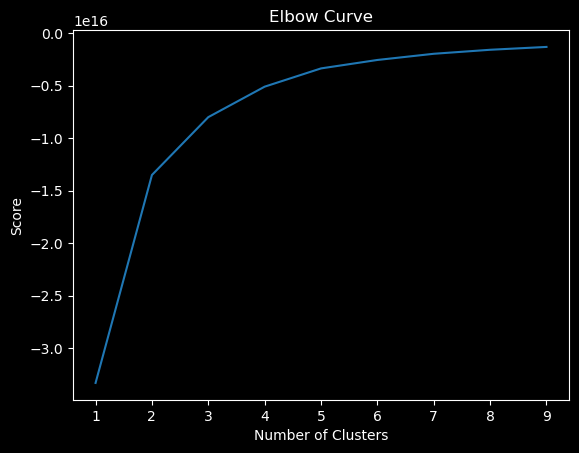

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters', color = 'white')
pl.ylabel('Score', color = 'white')
pl.title('Elbow Curve')
pl.show()

#### There is a increase from 2- 5 but the after 5 the elbow curve straightens out. This means that the optimal count of clusters is five.

## 3. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

KMeans(n_clusters=5)

In [18]:
df_1['clusters'] = kmeans.fit_predict(df_1)

C:\Users\babum\AppData\Local\Temp\ipykernel_3332\2087946470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['clusters'] = kmeans.fit_predict(df_1)


In [19]:
df_1.head()

,enroll,year,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp,clusters
0,9609.0,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506,0
1,30931.0,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749,4
2,912.0,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110,0
3,2842.0,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133,0
4,3322.0,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486,0


In [20]:
df_1['clusters'].value_counts()

0    229338
4      5699
3       304
2        21
1        12
Name: clusters, dtype: int64

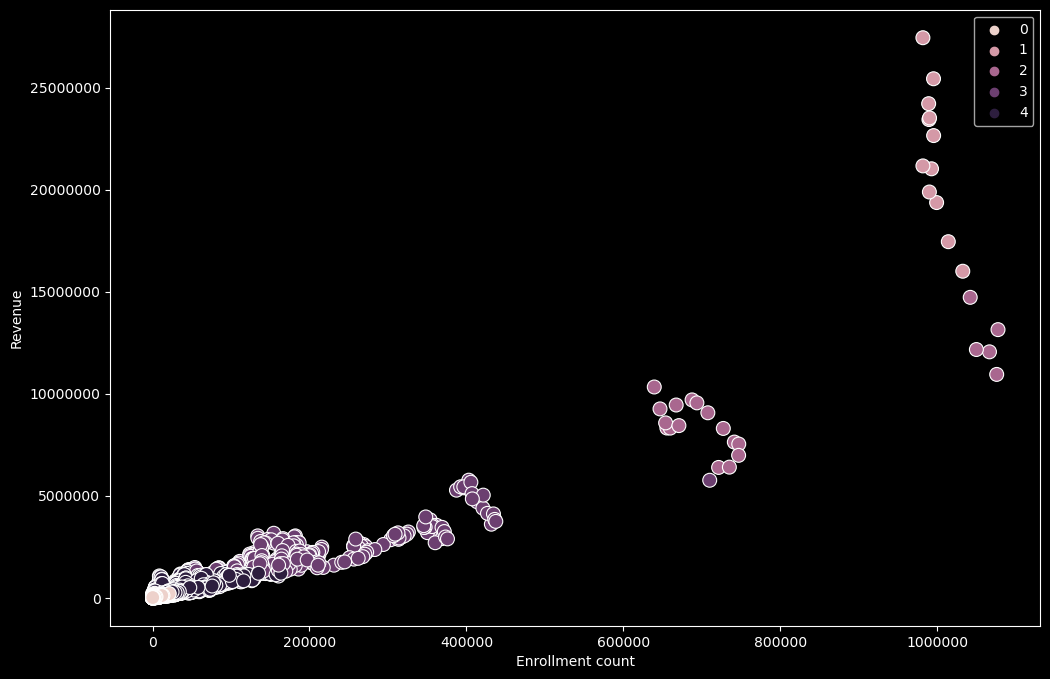

In [21]:
# Plot the clusters for the enrollment count and total revenue

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['enroll'], y=df_1['total_rev'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Enrollment count', color = 'white') 
plt.ylabel('Revenue', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

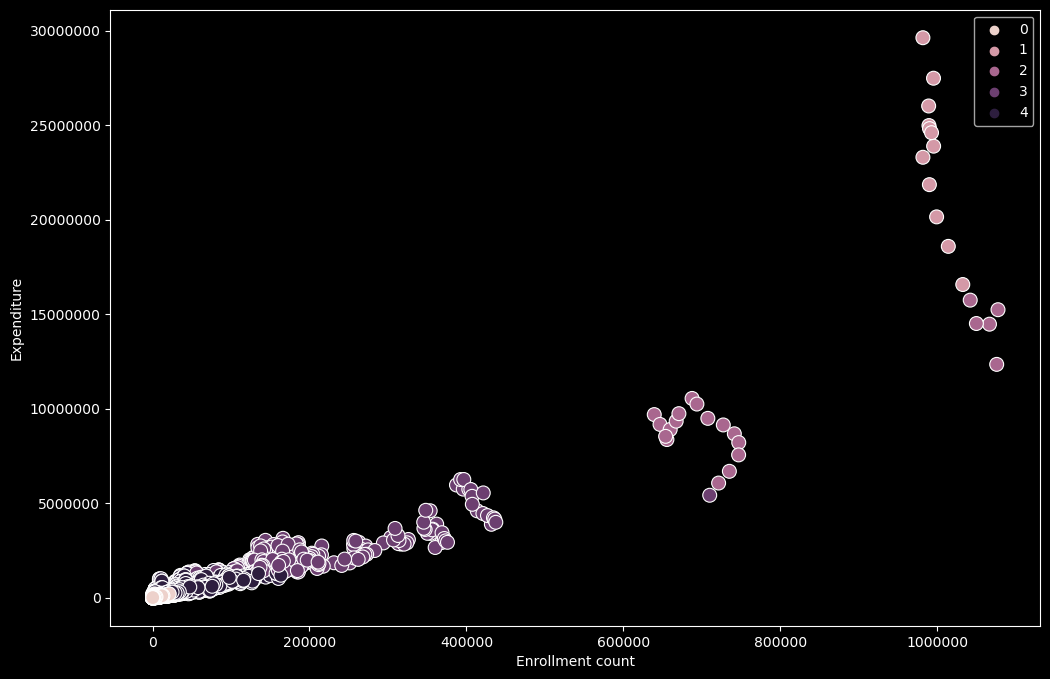

In [22]:
# Plot the clusters for enroll and expenditure

plt.figure(figsize=(12,8))
bx = sns.scatterplot(y=df_1['total_exp'], x=df_1['enroll'], hue=kmeans.labels_, s=100) 
bx.grid(False) 
plt.xlabel('Enrollment count', color = 'white') 
plt.ylabel('Expenditure', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

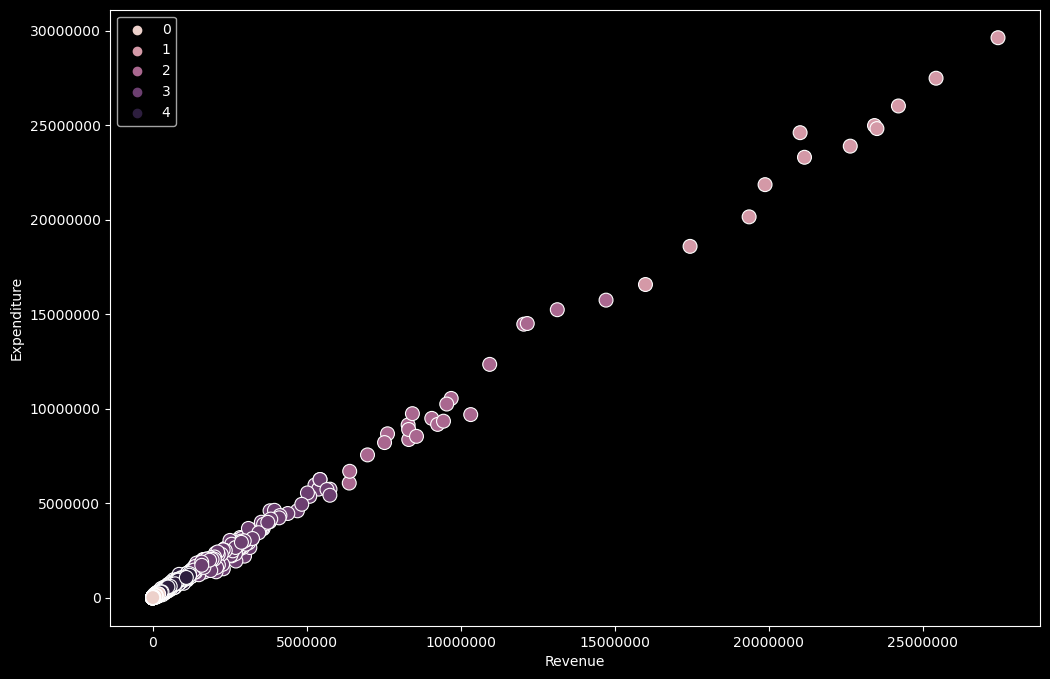

In [23]:
# Plot the clusters for revenue and expenditure

plt.figure(figsize=(12,8))
cx = sns.scatterplot(x=df_1['total_rev'], y=df_1['total_exp'], hue=kmeans.labels_, s=100) 
cx.grid(False) 
plt.xlabel('Revenue', color = 'white') 
plt.ylabel('Expenditure', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

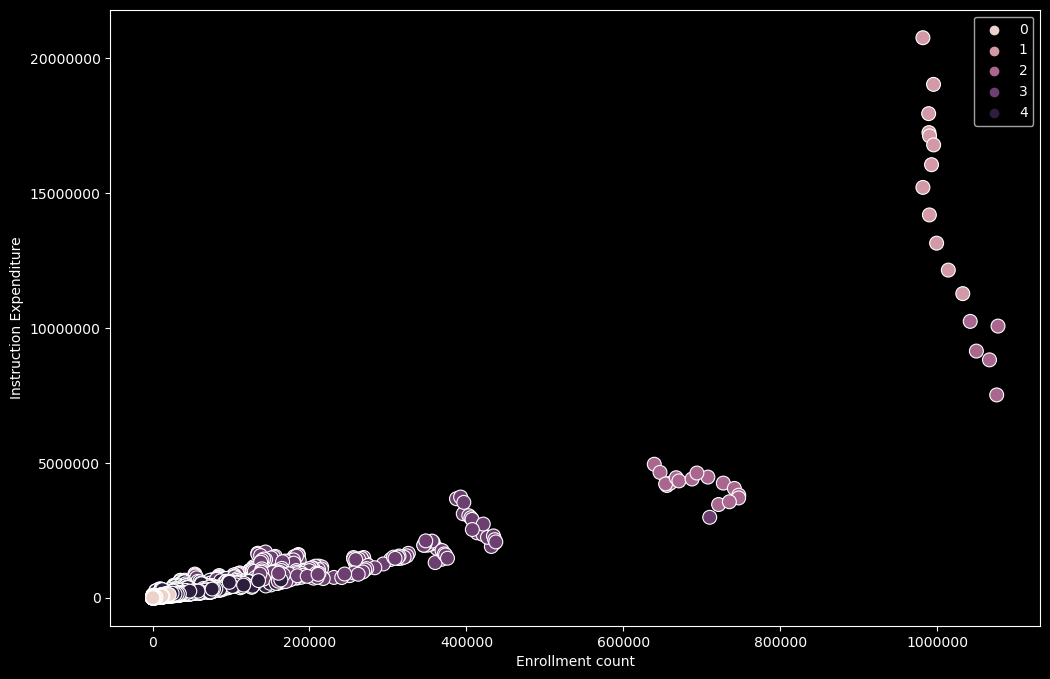

In [24]:
# Plot the clusters for enroll and instruction expenditure

plt.figure(figsize=(12,8))
dx = sns.scatterplot(x=df_1['enroll'], y=df_1['instruction_exp'], hue=kmeans.labels_, s=100) 
dx.grid(False) 
plt.xlabel('Enrollment count', color = 'white') 
plt.ylabel('Instruction Expenditure', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

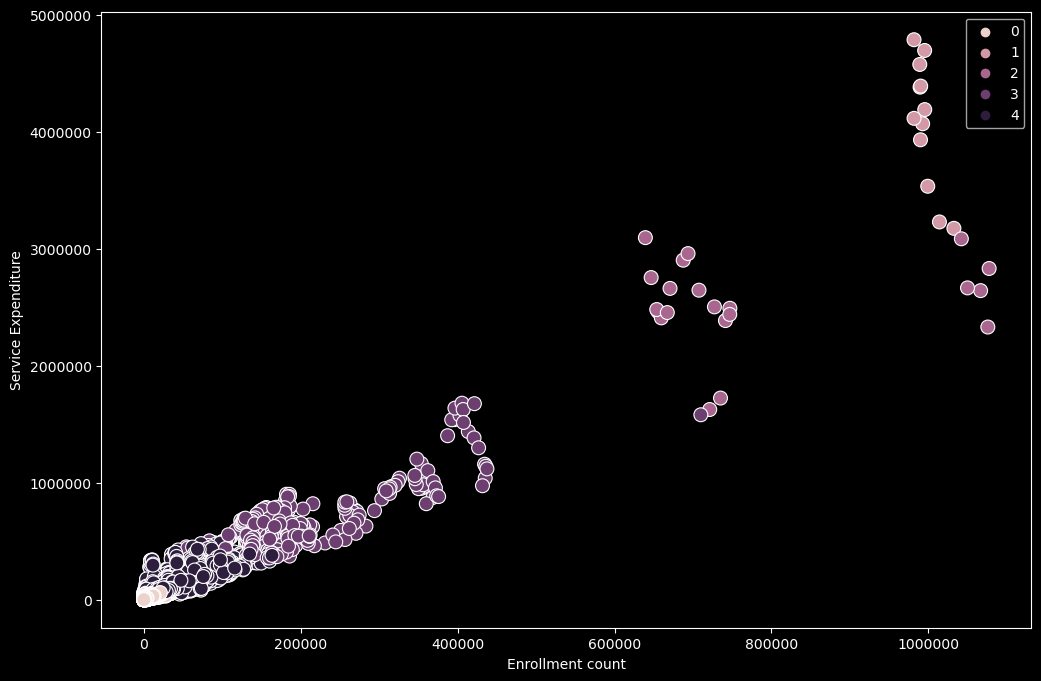

In [25]:
# Plot the clusters for enroll and service expenditure

plt.figure(figsize=(12,8))
ex = sns.scatterplot(x=df_1['enroll'], y=df_1['service_exp'], hue=kmeans.labels_, s=100) 
ex.grid(False) 
plt.xlabel('Enrollment count', color = 'white') 
plt.ylabel('Service Expenditure', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

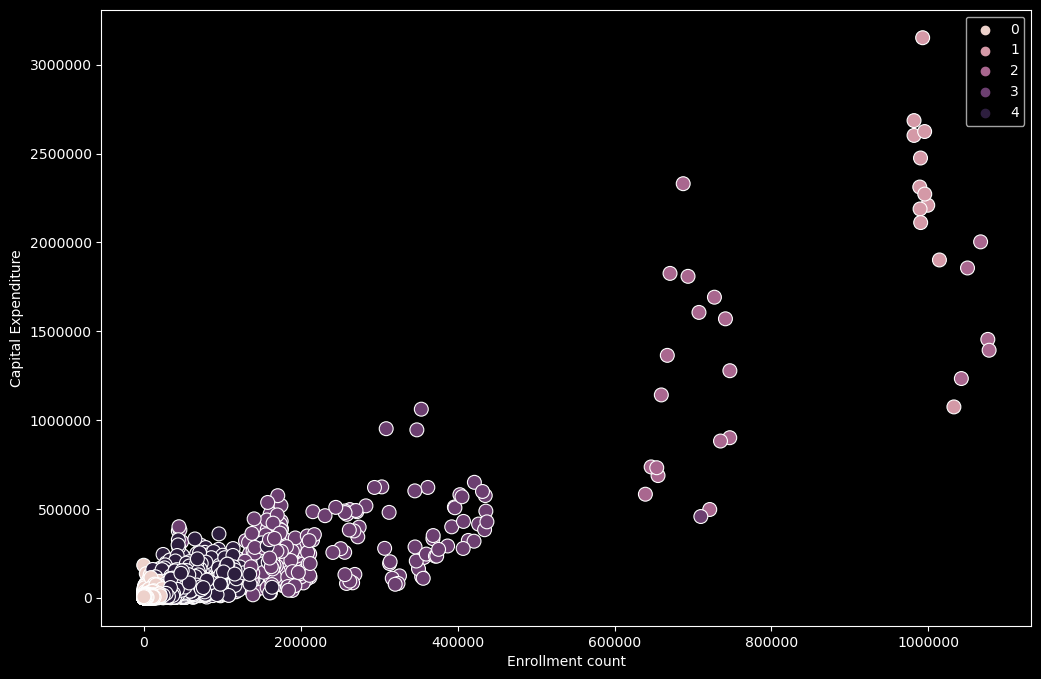

In [26]:
# Plot the clusters for enroll and capital expenditure

plt.figure(figsize=(12,8))
fx = sns.scatterplot(x=df_1['enroll'], y=df_1['capital_exp'], hue=kmeans.labels_, s=100) 
fx.grid(False) 
plt.xlabel('Enrollment count', color = 'white') 
plt.ylabel('Capital Expenditure', color = 'white') 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show()

#### The 0 cluster whichis the light pink cluster, 3 cluster that is purple cluster, and 2 cluster that is light purple cluster are the dominant clusters. They are more datapoints in these clusters as this forms the majoirity of the school districts.

#### The dark purple and pink cluster that are higher in enrollment count receives higher revenue and has higher expenses. These are the clusters of the big states like California, Texas. These states have higher enrollment count and therefore receive higher revenue and expenditure.

#### There is a linear relationship between the revenue and expenditure. The expenditure in the school districts is based on the revenue that the district receives each year.

#### There is more variance in the relationship between enrollment count and capital expenditure. The data points in clusters of dark purple and pink are scattered, this might indicate capital expenditure are not solely dependant on enrollment count. 

## Descriptive statistics

In [27]:
df_1.loc[df_1['clusters'] == 4, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'light purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'pink'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'light pink'

In [28]:
df_1.groupby('cluster').agg({'enroll':['mean', 'median'], 
                         'total_rev':['mean', 'median'], 
                         'total_exp':['mean', 'median'],
                          'instruction_exp':['mean', 'median']})

enroll               total_rev                 total_exp  \
                       mean    median          mean      median          mean   
cluster                                                                         
dark purple    37810.154413   31954.0  4.102715e+05    332410.0  4.166422e+05   
light pink      2233.252492    1052.0  2.461420e+04     11518.5  2.475253e+04   
light purple  781531.666667  721346.0  9.391910e+06   9064937.0  1.012429e+07   
pink          995894.166667  991404.0  2.180056e+07  21908626.0  2.348496e+07   
purple        196264.174342  173252.5  2.193483e+06   1925318.5  2.236185e+06   

                         instruction_exp              
                  median            mean      median  
cluster                                               
dark purple     338720.0    2.109770e+05    170878.0  
light pink       11442.0    1.283425e+04      5872.0  
light purple   9337246.0    5.387505e+06   4403066.0  
pink          24241069.5    1.591356e+07  16425073.5  
purple         1956512.0    1.132149e+06    954959.5

### The regression analysis and clustering analysis indicates that enrollment count plays an important role in the revenue received by the school district.

### The dataset does not provide with any other variables for us to check if any other factor affect the revenue.

### The population in those district could provide us some insight on how the population affects the revenue received in the school district.